# Project    Muesli

### Client
A Muesli distribution company 

### Description of the project
The client wants to understand their delivery process. They want to develop KPIs to help them keep track of the health of their business in order to improve the service they offer their customers.

### The goals and objectives of the project
Based on the data analysis, propose several indicators and metrics that would be useful for tracking the effectiveness of processes in general and at each stage of business process.

### The received data
To conduct the study, a dataset was obtained that contains data on the clients of the Muesli distribution company.

**Table "Orders":**  

| Name                 | Description                  |
|----------------------|------------------------------|
| Index                | Index                        |
| Order ID             | Identifier of the order      |
| Order Date           | Date of the order            |
| Ship Mode            | Shipping class               |
| Customer ID          | Identifier of the customer   |
| Customer Name        | Name of the customer         |
| Origin Channel       | Distribution channel         |
| Country/Region       | Country/Region of sales      |
| City                 | City of sales                |
| State                | State of sales               |
| Postal Code          | Postal Code                  |
| Region               | Region of sales              |
| Category             | Category of product          |
| Sub_Category         | Sub_Category of product      |
| Product ID           | Identifier of the product    |
| Sales                | Product's price              |
| Quantity             | Quantity in the order        |
| Discount             | Order's discount             |
| Profit               | Order's profit               |

**Table "Campaign Data":** 

| Name                 | Description                                 |
|----------------------|---------------------------------------------|
| Order ID             | Identifier of the order                     |
| Arrival Scan Date    | Date of the arrival of the order            |
| Customer Name        | Name of the customer                        |

**Table "Order Process Data":** 

| Name                 | Description                                 |
|----------------------|---------------------------------------------|
| Row ID               | Identifier of the row                       |
| Order ID             | Identifier of the order                     |
| Customer Name        | Name of the customer                        |
| Order Date           | Date of the order                           |
| On Truck Scan Date   | Date of loading into the car                |
| Ship Mode            | Standart or Express                         |

**Table "InternData Study":** 

| Name                 | Description                                 |
|----------------------|---------------------------------------------|
| Order ID             | Identifier of the order                     |
| Ready to Ship Date   | Date of shipment from the warehouse         |
| Pickup Date          | Date of loading into the car                |

## Step-by-Step Workflow

### The workflow, received from the warehouse manager: 
Order received (Day 1) - order processed in warehouse and made ready to ship (normally 2 days) - order leaves warehouse in truck following day - order delivered to customer (handled by logistics company). The logistics company has said they have on average 3 day delivery times to all locations.

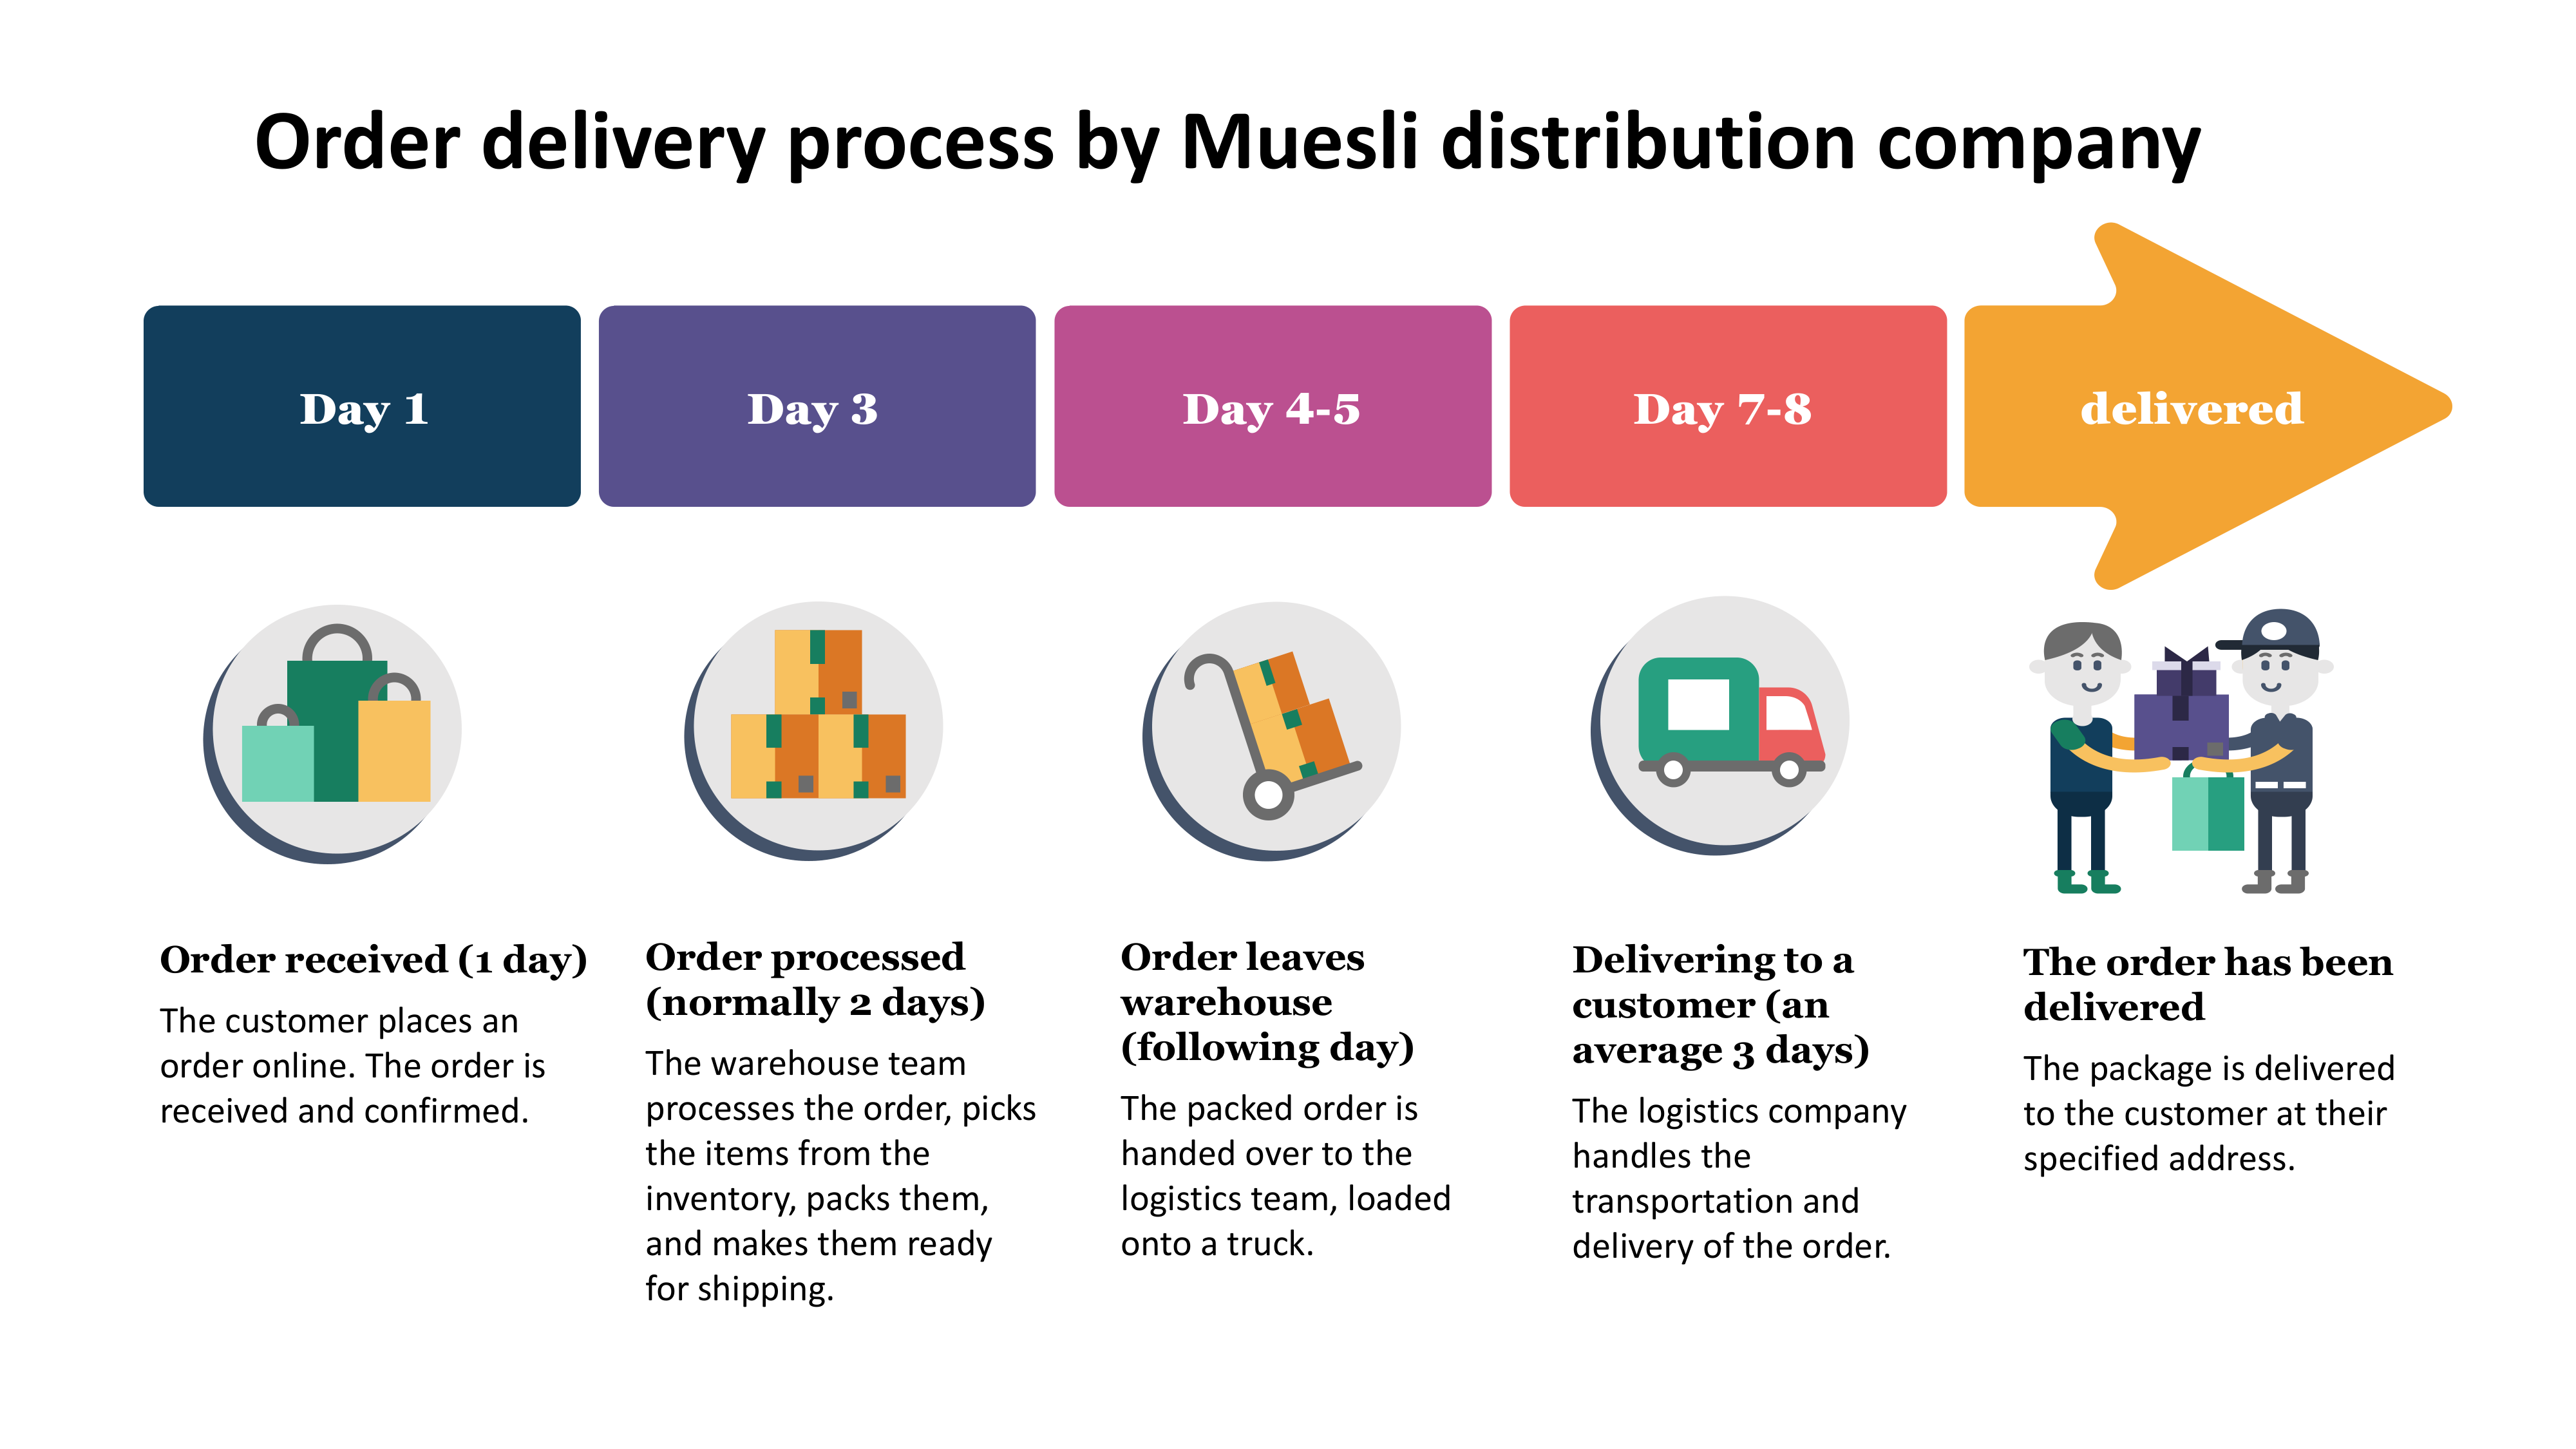

In [59]:
from IPython.display import Image
Image('Musli project.png')

### Suggested Key Performance Indicators (KPIs)

1. `Order Processing Time:` 
Time from order received to order ready to ship.
* Calculation: Ready to Ship Date - Order Date
* Target: 2 days (considering business days)

2. `Warehouse Efficiency:` 
Percentage of orders processed within the target time.
* Calculation: (Number of orders processed within 2 days / Total number of orders) * 100
* Target: High percentage, e.g., 95%

3. `Truck Departure Time:` 
Time from order ready to ship to order leaves warehouse.
* Calculation: On Truck Scan Date - Ready to Ship Date
* Target: Next available truck day (Monday, Wednesday, Friday), or same day for Express Processing

4. `On-Time Shipment Percentage:` 
Percentage of orders shipped on the expected truck day.
* Calculation: (Number of orders shipped on the expected day / Total number of orders) * 100
* Target: High percentage, e.g., 95%

5. `Delivery Time:` 
Time from order leaves warehouse to order delivered to customer.
* Calculation: Delivery Date - On Truck Scan Date
* Target: 3 days (considering business days for final delivery)

### Label the flowchart with any logic affecting order flow:

* Orders received on weekends start processing on Monday.
* Trucks leave on Monday, Wednesday, and Friday.
* Express Processing: Orders ready to ship are picked up on the same day.
* Standard Processing: Orders ready to ship are picked up the next available truck day.*

## Descriptive Analytics

### Loading libraries

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime


### Loading dataset

In [61]:
df_orders = pd.read_excel('./data/Muesli Project raw data1.xlsx', sheet_name="Orders", header = 1)
df_campaign = pd.read_excel('./data/Muesli Project raw data1.xlsx', sheet_name="Campaign Data", header = 0)
df_order_process = pd.read_excel('./data/Muesli Project raw data1.xlsx', sheet_name="Order Process Data", header = 0)
df_intern = pd.read_excel('./data/Muesli Project raw data1.xlsx', sheet_name="InternData Study", header = 0)


### Preparing Data for analysis

In [62]:
df_orders.head()

,Index,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.0,4.9500
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.0,3.3000
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.0,6.1512


In [63]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Index           9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Mode       9994 non-null   object        
 4   Customer ID     9994 non-null   object        
 5   Customer Name   9994 non-null   object        
 6   Origin Channel  9994 non-null   object        
 7   Country/Region  9994 non-null   object        
 8   City            9994 non-null   object        
 9   State           9994 non-null   object        
 10  Postal Code     9983 non-null   float64       
 11  Region          9994 non-null   object        
 12  Category        9994 non-null   object        
 13  Sub-Category    9994 non-null   object        
 14  Product ID      9994 non-null   object        
 15  Sale

In [64]:
 # dropping the column irrelevant to us
df_orders = df_orders.drop(df_orders.columns[[0, 6,7,8,9,10,11,12,13,14,15,16,17,18]], axis=1)
df_orders.head()

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann
1,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson
2,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez
3,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield
4,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller


In [65]:
# reducing the titles of the headings to lower case, change the names to more convenient ones

df_orders = df_orders.rename(columns={'Order ID': 'order_id', 'Order Date' : 'order_date',
                            'Ship Mode':'ship_mode','Customer ID':'customer_id','Customer Name':'customer_name' })

df_orders.columns

Index(['order_id', 'order_date', 'ship_mode', 'customer_id', 'customer_name'], dtype='object')

In [66]:
# inspect duplicates
duplicates = df_orders[df_orders.duplicated(keep=False)]
print('Duplicates:', df_orders.duplicated().sum(), 'Share of duplicates:', df_orders.duplicated().sum() / len(df_orders)*100)
duplicates.sort_values(by=['order_id']).head

Duplicates: 4985 Share of duplicates: 49.87992795677407


<bound method NDFrame.head of             order_id order_date       ship_mode customer_id customer_name
6507  CA-2017-100090 2017-07-08  Standard Class    EB-13705    Ed Braxton
8069  CA-2017-100090 2017-07-08  Standard Class    EB-13705    Ed Braxton
1173  CA-2017-100363 2017-04-08  Standard Class    JM-15655   Jim Mitchum
2644  CA-2017-100363 2017-04-08  Standard Class    JM-15655   Jim Mitchum
499   CA-2017-100678 2017-04-18  Standard Class    KM-16720  Kunst Miller
...              ...        ...             ...         ...           ...
5220  US-2020-169551 2020-07-07     First Class    RL-19615     Rob Lucas
4023  US-2020-169551 2020-07-07     First Class    RL-19615     Rob Lucas
2942  US-2020-169551 2020-07-07     First Class    RL-19615     Rob Lucas
8328  US-2020-169551 2020-07-07     First Class    RL-19615     Rob Lucas
455   US-2020-169551 2020-07-07     First Class    RL-19615     Rob Lucas

[7456 rows x 5 columns]>

In [67]:
# delete duplicates
df_orders = df_orders.drop_duplicates()

In [68]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5009 entries, 0 to 9988
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       5009 non-null   object        
 1   order_date     5009 non-null   datetime64[ns]
 2   ship_mode      5009 non-null   object        
 3   customer_id    5009 non-null   object        
 4   customer_name  5009 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 234.8+ KB


In [69]:
df_campaign.head()

,Order ID,Arrival Scan Date,Customer Name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron
2,CA-2019-130001,2019-05-03,Heather Kirkland
3,CA-2019-113061,2019-05-06,Ed Ludwig
4,CA-2019-162138,2019-05-06,Grace Kelly


In [70]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           333 non-null    object        
 1   Arrival Scan Date  333 non-null    datetime64[ns]
 2   Customer Name      333 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 7.9+ KB


In [71]:
# reducing the titles of the headings to lower case, change the names to more convenient ones

df_campaign = df_campaign.rename(columns={'Order ID': 'order_id', 'Arrival Scan Date' : 'arrival_date',
                                          'Customer Name':'customer_name' })
df_campaign.columns

Index(['order_id', 'arrival_date', 'customer_name'], dtype='object')

In [72]:
# inspect duplicates
duplicates = df_campaign[df_campaign.duplicated(keep=False)]
print('Duplicates:', df_campaign.duplicated().sum(), 'Share of duplicates:', df_campaign.duplicated().sum() / len(df_campaign)*100)
duplicates.sort_values(by=['order_id']).head

Duplicates: 0 Share of duplicates: 0.0


<bound method NDFrame.head of Empty DataFrame
Columns: [order_id, arrival_date, customer_name]
Index: []>

In [73]:
df_order_process.head()

,Row ID,Order ID,Order Date,On Truck Scan Date,Ship Mode
0,3074,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,4920,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,8604,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,8605,US-2019-116365,2019-01-03,2019-01-09,Standard Processing


In [74]:
df_order_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Row ID              5899 non-null   int64         
 1   Order ID            5899 non-null   object        
 2   Order Date          5899 non-null   datetime64[ns]
 3   On Truck Scan Date  5899 non-null   datetime64[ns]
 4   Ship Mode           5899 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 230.6+ KB


In [75]:
 # dropping the column irrelevant to us

df_order_process = df_order_process.drop(df_order_process.columns[0], axis=1)

In [76]:
# reducing the titles of the headings to lower case, change the names to more convenient ones

df_order_process = df_order_process.rename(columns={'Order ID': 'order_id', 'Order Date' : 'order_date',
                                          'On Truck Scan Date':'on_truck_date','Ship Mode':'ship_mode' })
df_order_process.columns

Index(['order_id', 'order_date', 'on_truck_date', 'ship_mode'], dtype='object')

In [77]:
# inspect duplicates
duplicates = df_order_process[df_order_process.duplicated(keep=False)]
print('Duplicates:', df_order_process.duplicated().sum(), 'Share of duplicates:', df_order_process.duplicated().sum() / len(df_order_process)*100)
duplicates.sort_values(by=['order_id']).head

Duplicates: 2896 Share of duplicates: 49.09306662146126


<bound method NDFrame.head of             order_id order_date on_truck_date            ship_mode
2122  CA-2019-100041 2019-11-20    2019-11-27  Standard Processing
2123  CA-2019-100041 2019-11-20    2019-11-27  Standard Processing
2124  CA-2019-100041 2019-11-20    2019-11-27  Standard Processing
1564  CA-2019-100244 2019-09-20    2019-09-25  Standard Processing
1565  CA-2019-100244 2019-09-20    2019-09-25  Standard Processing
...              ...        ...           ...                  ...
3797  US-2020-169551 2020-07-07    2020-07-10              Express
3796  US-2020-169551 2020-07-07    2020-07-10              Express
3795  US-2020-169551 2020-07-07    2020-07-10              Express
3800  US-2020-169551 2020-07-07    2020-07-10              Express
3798  US-2020-169551 2020-07-07    2020-07-10              Express

[4339 rows x 4 columns]>

In [78]:
# drop duplicates
df_order_process = df_order_process.drop_duplicates()
df_order_process.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3003 entries, 0 to 5898
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       3003 non-null   object        
 1   order_date     3003 non-null   datetime64[ns]
 2   on_truck_date  3003 non-null   datetime64[ns]
 3   ship_mode      3003 non-null   object        
dtypes: datetime64[ns](2), object(2)
memory usage: 117.3+ KB


In [79]:
df_intern.head()

,Order ID,Ready to Ship Date,Pickup Date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03
2,CA-2019-129847,2019-09-04,2019-09-04
3,CA-2019-129630,2019-09-04,2019-09-04
4,CA-2019-106278,2019-09-05,2019-09-06


In [80]:
df_intern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order ID            290 non-null    object        
 1   Ready to Ship Date  290 non-null    datetime64[ns]
 2   Pickup Date         290 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.9+ KB


In [81]:
# reducing the titles of the headings to lower case, change the names to more convenient ones
df_intern = df_intern.rename(columns={'Order ID': 'order_id', 'Ready to Ship Date' : 'ready_to_ship_date',
                                          'Pickup Date':'pickup_date' })
df_intern.columns

Index(['order_id', 'ready_to_ship_date', 'pickup_date'], dtype='object')

In [82]:
# inspect duplicates
duplicates = df_intern[df_intern.duplicated(keep=False)]
print('Duplicates:', df_intern.duplicated().sum(), 'Share of duplicates:', df_intern.duplicated().sum() / len(df_intern)*100)
duplicates.sort_values(by=['order_id']).head

Duplicates: 86 Share of duplicates: 29.655172413793103


<bound method NDFrame.head of            order_id ready_to_ship_date pickup_date
78   CA-2019-100244         2019-09-24  2019-09-25
79   CA-2019-100244         2019-09-24  2019-09-25
80   CA-2019-100244         2019-09-24  2019-09-25
82   CA-2019-100244         2019-09-24  2019-09-25
83   CA-2019-100244         2019-09-24  2019-09-25
..              ...                ...         ...
152  US-2020-155425         2020-11-11  2020-11-12
225  US-2020-155866         2020-11-23  2020-11-25
215  US-2020-155866         2020-11-23  2020-11-25
107  US-2020-163790         2020-11-04  2020-11-06
104  US-2020-163790         2020-11-04  2020-11-06

[147 rows x 3 columns]>

In [83]:
df_intern = df_intern.drop_duplicates()
df_intern.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            204 non-null    object        
 1   ready_to_ship_date  204 non-null    datetime64[ns]
 2   pickup_date         204 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.4+ KB


In [84]:
# Making one dataframe 

# df_muesli = pd.merge(df_orders, df_campaign, on=['order_id', 'customer_name'], how='inner')
df_muesli = pd.merge(df_orders, df_order_process, on=['order_id', 'order_date'], how='inner')
df_muesli = pd.merge(df_muesli, df_campaign, on=['order_id', 'customer_name'], how='left')
df_muesli = pd.merge(df_muesli, df_intern, on=['order_id'], how='left')

In [85]:
df_muesli.head(10)

,order_id,order_date,ship_mode_x,customer_id,customer_name,on_truck_date,ship_mode_y,arrival_date,ready_to_ship_date,pickup_date
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,2019-01-23,Standard Processing,NaT,NaT,NaT
1,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,2019-03-13,Express,NaT,NaT,NaT
2,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,2019-06-26,Standard Processing,NaT,NaT,NaT
3,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,2019-06-19,Express,NaT,NaT,NaT
4,CA-2020-155558,2020-10-26,Standard Class,PG-18895,Paul Gonzalez,2020-11-04,Standard Processing,NaT,NaT,NaT
5,CA-2019-158568,2019-08-29,Standard Class,RB-19465,Rick Bensley,2019-09-04,Standard Processing,NaT,NaT,NaT
6,CA-2020-119004,2020-11-23,Standard Class,JM-15250,Janet Martin,2020-12-02,Standard Processing,NaT,2020-11-30,2020-12-02
7,US-2020-100930,2020-04-07,Standard Class,CS-12400,Christopher Schild,2020-04-15,Standard Processing,NaT,NaT,NaT
8,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Kelly Collister,2019-09-18,Standard Processing,2019-09-23,2019-09-17,2019-09-18
9,CA-2020-163139,2020-12-01,Second Class,CC-12670,Craig Carreira,2020-12-04,Standard Processing,NaT,NaT,NaT


In [86]:
# Combining similar columns
df_muesli['ship_mode'] = df_muesli['ship_mode_y'].combine_first(df_muesli['ship_mode_x'])
df_muesli['on_truck_date'] = df_muesli['on_truck_date'].combine_first(df_muesli['pickup_date'])

# Deleting old columns
df_muesli.drop(columns=['ship_mode_x', 'ship_mode_y','pickup_date'], inplace=True)

# Swapping the columns
df_muesli = df_muesli.reindex(columns=['order_id', 'order_date', 'customer_id',
                                        'customer_name', 'ship_mode', 'ready_to_ship_date',
                                        'on_truck_date','arrival_date'])


df_muesli.tail()

,order_id,order_date,customer_id,customer_name,ship_mode,ready_to_ship_date,on_truck_date,arrival_date
2998,US-2020-109610,2020-11-25,BS-11590,Brendan Sweed,Standard Processing,2020-11-30,2020-12-02,NaT
2999,CA-2019-146913,2019-10-31,SF-20965,Sylvia Foulston,Standard Processing,NaT,2019-11-06,2019-11-11
3000,CA-2020-107209,2020-07-27,JW-15955,Joni Wasserman,Standard Processing,NaT,2020-08-05,NaT
3001,US-2020-152842,2020-07-16,NF-18385,Natalie Fritzler,Standard Processing,NaT,2020-07-24,NaT
3002,CA-2019-122581,2019-08-21,JK-15370,Jay Kimmel,Standard Processing,NaT,2019-08-28,NaT


In [87]:
# inspect duplicates
duplicates = df_muesli[df_muesli.duplicated(keep=False)]
duplicates.sort_values(by=['order_id'])

# total nr of duplicates
len(duplicates)


0

In [88]:
df_muesli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3003 entries, 0 to 3002
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            3003 non-null   object        
 1   order_date          3003 non-null   datetime64[ns]
 2   customer_id         3003 non-null   object        
 3   customer_name       3003 non-null   object        
 4   ship_mode           3003 non-null   object        
 5   ready_to_ship_date  204 non-null    datetime64[ns]
 6   on_truck_date       3003 non-null   datetime64[ns]
 7   arrival_date        333 non-null    datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 187.8+ KB


In [89]:
# number of gaps
df_muesli.isna().sum()

order_id                 0
order_date               0
customer_id              0
customer_name            0
ship_mode                0
ready_to_ship_date    2799
on_truck_date            0
arrival_date          2670
dtype: int64

In [90]:
# percentage of gaps
gaps = df_muesli.isna().sum()/len(df_muesli.isna())*100
gaps

order_id               0.000000
order_date             0.000000
customer_id            0.000000
customer_name          0.000000
ship_mode              0.000000
ready_to_ship_date    93.206793
on_truck_date          0.000000
arrival_date          88.911089
dtype: float64

In [91]:
# Saving the results to a new CSV файл
df_muesli.to_csv('Muesli_cleaned_data.csv', index=False)

## Exploratory Data Analysis

### Calculate time taken for each step

In [92]:
def business_days_between(start_date, end_date):
    if pd.isna(start_date) or pd.isna(end_date):
        return float('nan')
    return len(pd.bdate_range(start=start_date, end=end_date)) - 1

In [93]:
df_muesli['order_to_ready'] = df_muesli.apply(lambda row: business_days_between(row['order_date'], row['ready_to_ship_date']), axis=1)
df_muesli['ready_to_truck'] = (df_muesli['on_truck_date'] - df_muesli['ready_to_ship_date']).dt.days
df_muesli['order_to_truck'] = (df_muesli['on_truck_date'] - df_muesli['order_date']).dt.days  
df_muesli['truck_to_arrival'] = df_muesli.apply(lambda row: business_days_between(row['on_truck_date'], row['arrival_date']), axis=1)
df_muesli['total_days'] = (df_muesli['arrival_date'] - df_muesli['order_date']).dt.days

### Calculation of the delay days 

In [94]:
# A function for setting the rate depending on the day of the week and the type of delivery
def get_norm_on_truck(day_of_week):
    norms = {
        0: (3, 5),  # Monday
        1: (4, 4),  # Tuesday
        2: (3, 6),  # Wednesday
        3: (5, 7),  # Thursday
        4: (6, 6),  # Friday
        5: (5, 5),  # Saturday
        6: (4, 4)   # Sunday
    }
    return norms[day_of_week]

In [95]:
# DELAYS BETWEEN ODER_DATE AND READY_TO_SHIP_DATE
df_muesli['delay_ready_to_ship'] = df_muesli['order_to_ready']-2

# DELAYS BETWEEN ARRIVAL_DATE AND ON_TRUCK_DATE
df_muesli['delay_arrival'] = df_muesli['truck_to_arrival']-3

In [96]:
# DELAYS BETWEEN ODER_DATE AND ON_TRUCK_DATE (express and standart separately)
# Determine day of the week of order date (0 - Mon, 6 - Sun)
df_muesli['order_day_of_week'] = df_muesli['order_date'].dt.dayofweek

# Using the function to calculate the rates for each type of delivery
df_muesli[['norm_express', 'norm_standard']] = df_muesli['order_day_of_week'].apply(lambda x: pd.Series(get_norm_on_truck(x)))


# Calculation of excess rates for express delivery and standard delivery
df_muesli['delay_on_truck_express'] = df_muesli.apply(lambda row: row['order_to_truck'] - row['norm_express'] if row['ship_mode'] == 'Express' else 0, axis=1)
df_muesli['delay_on_truck_standard'] = df_muesli.apply(lambda row: row['order_to_truck'] - row['norm_standard'] if row['ship_mode'] == 'Standard Processing' else 0, axis=1)


In [97]:
# Deleting  columns that will not use
df_muesli.drop(columns=['norm_express','norm_standard'], inplace=True)

In [98]:
df_muesli[['order_id', 'ship_mode',	'order_to_ready', 'ready_to_truck',	'order_to_truck','truck_to_arrival', 'delay_ready_to_ship',	'delay_arrival', 'delay_on_truck_express',	'delay_on_truck_standard']].tail()

,order_id,ship_mode,order_to_ready,ready_to_truck,order_to_truck,truck_to_arrival,delay_ready_to_ship,delay_arrival,delay_on_truck_express,delay_on_truck_standard
2998,US-2020-109610,Standard Processing,3.0,2.0,7,NaN,1.0,NaN,0,1
2999,CA-2019-146913,Standard Processing,NaN,NaN,6,3.0,NaN,0.0,0,-1
3000,CA-2020-107209,Standard Processing,NaN,NaN,9,NaN,NaN,NaN,0,4
3001,US-2020-152842,Standard Processing,NaN,NaN,8,NaN,NaN,NaN,0,1
3002,CA-2019-122581,Standard Processing,NaN,NaN,7,NaN,NaN,NaN,0,1


### Exploring data

In [99]:
df_muesli[['order_to_ready','order_to_truck','truck_to_arrival','delay_arrival','delay_ready_to_ship','delay_on_truck_express','delay_on_truck_standard',]].describe().round()


,order_to_ready,order_to_truck,truck_to_arrival,delay_arrival,delay_ready_to_ship,delay_on_truck_express,delay_on_truck_standard
count,204.0,3003.0,333.0,333.0,204.0,3003.0,3003.0
mean,3.0,6.0,3.0,-0.0,1.0,-0.0,1.0
std,1.0,2.0,1.0,1.0,1.0,1.0,2.0
min,0.0,0.0,1.0,-2.0,-2.0,-6.0,-2.0
25%,2.0,5.0,3.0,0.0,0.0,0.0,0.0
50%,3.0,7.0,3.0,0.0,1.0,0.0,1.0
75%,4.0,8.0,3.0,0.0,2.0,0.0,4.0
max,5.0,12.0,5.0,2.0,3.0,3.0,8.0


### Comparing Exceeded Limit Days for Standart and Express Delivery

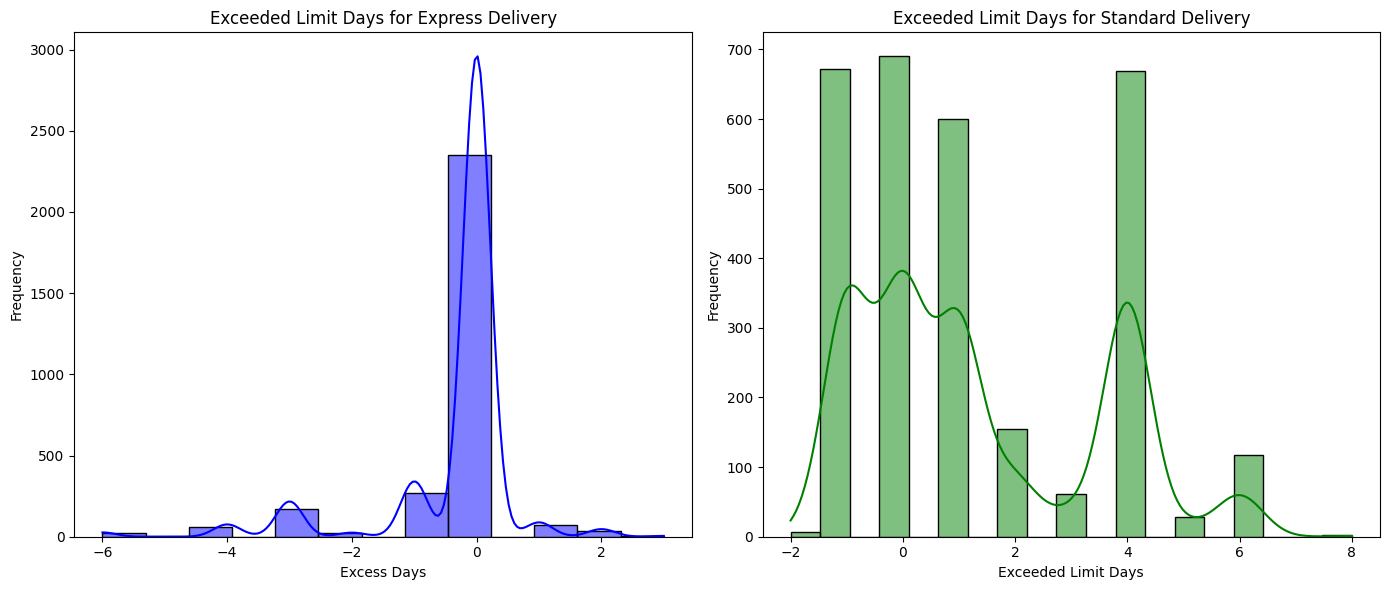

In [100]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_muesli['delay_on_truck_express'], kde=True, color='blue')
plt.title('Exceeded Limit Days for Express Delivery')
plt.xlabel('Excess Days')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_muesli['delay_on_truck_standard'], kde=True, color='green')
plt.title('Exceeded Limit Days for Standard Delivery')
plt.xlabel('Exceeded Limit Days')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

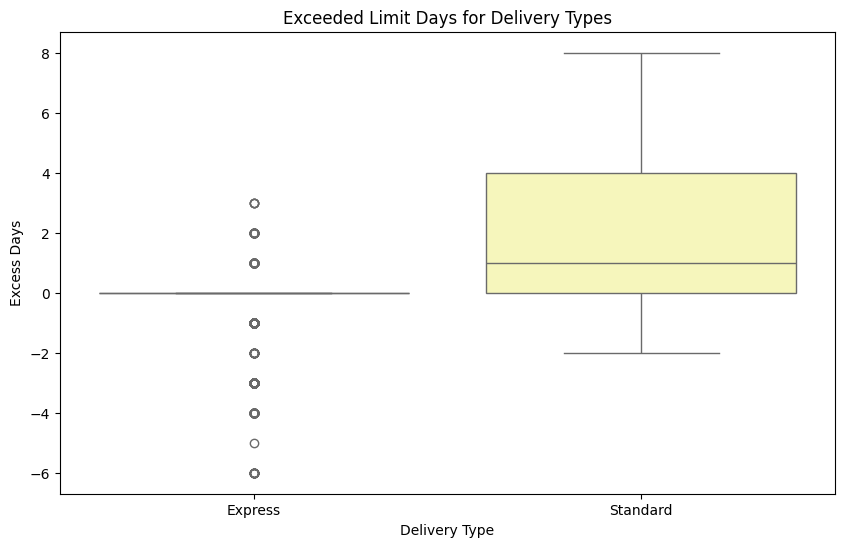

In [101]:
# Boxplots for exceeding the norm
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_muesli[['delay_on_truck_express', 'delay_on_truck_standard']], palette='Set3')
plt.title('Exceeded Limit Days for Delivery Types')
plt.xlabel('Delivery Type')
plt.ylabel('Excess Days')
plt.xticks([0, 1], ['Express', 'Standard'])
plt.show()

<Figure size 1000x600 with 0 Axes>

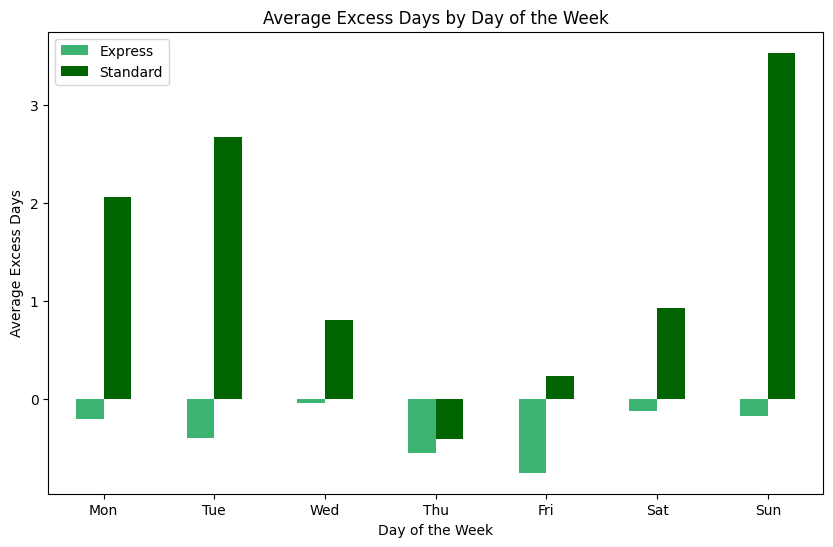

In [102]:
# Comparative bar chart of the average excess of the norm by day of the week
weekly_excess = df_muesli.groupby('order_day_of_week')[['delay_on_truck_express', 'delay_on_truck_standard']].mean().reset_index()

plt.figure(figsize=(10, 6))
weekly_excess.plot(kind='bar', x='order_day_of_week', stacked=False, color=['mediumseagreen', 'darkgreen'], figsize=(10, 6))
plt.title('Average Excess Days by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Excess Days')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.legend(['Express', 'Standard'])
plt.show()

<Figure size 1000x600 with 0 Axes>

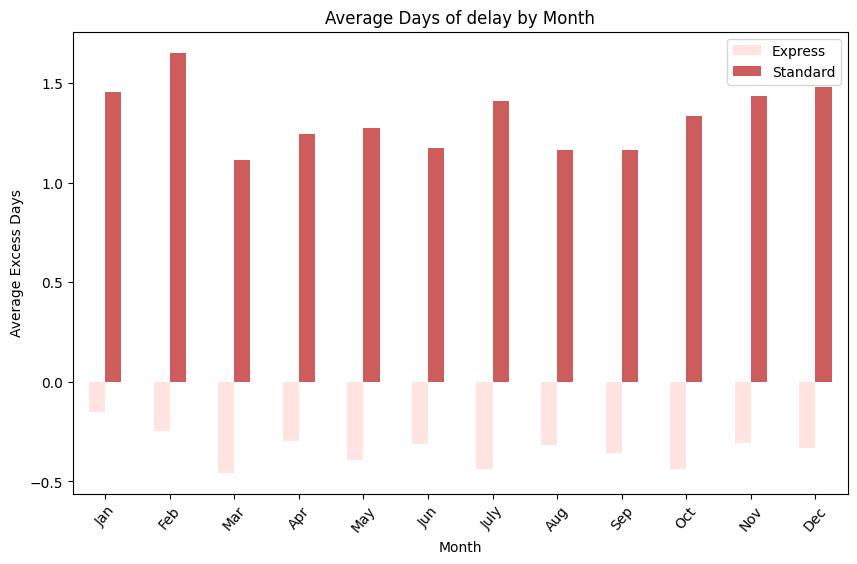

In [103]:
# Comparative bar chart of the average excess of the norm by month
df_muesli['order_month'] = df_muesli['order_date'].dt.month

month_excess = df_muesli.groupby('order_month')[['delay_on_truck_express', 'delay_on_truck_standard']].mean().reset_index()

plt.figure(figsize=(10, 6))
month_excess.plot(kind='bar', x='order_month', stacked=False, color=['mistyrose' ,'indianred'], figsize=(10, 6))
plt.title('Average Days of delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Excess Days')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct','Nov', 'Dec'], rotation=50)
plt.legend(['Express', 'Standard'])
plt.show();

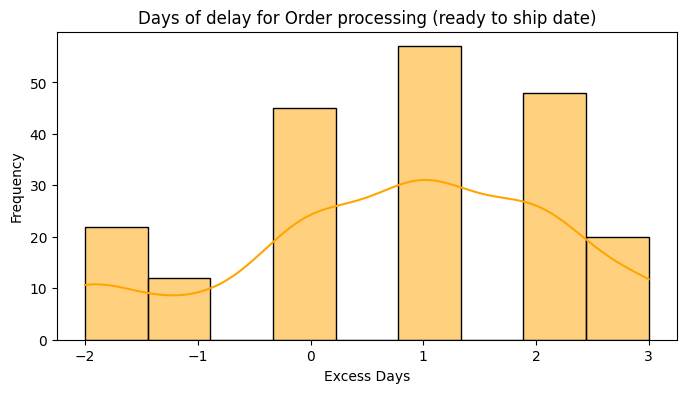

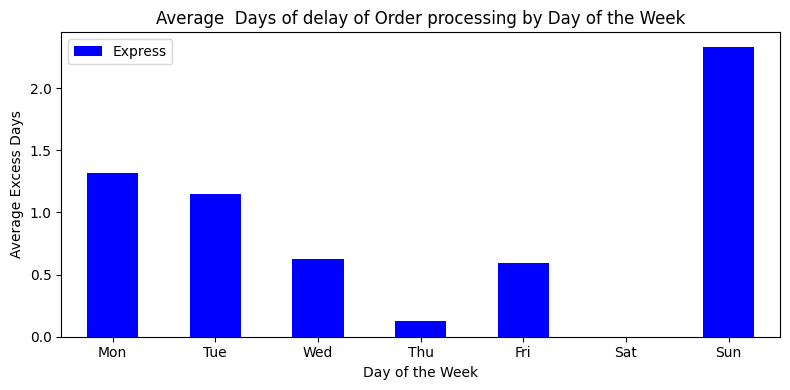

In [104]:
#Average  Days of delay of Order processing by Day of the Week
plt.figure(figsize=(8, 4))

# plt.subplot(1, 2, 1)
sns.histplot(df_muesli['delay_ready_to_ship'], kde=True, color='orange')
plt.title('Days of delay for Order processing (ready to ship date)')
plt.xlabel('Excess Days')
plt.ylabel('Frequency')

# plt.subplot(1, 2, 2)

weekly_delay = df_muesli.groupby('order_day_of_week')['delay_ready_to_ship'].mean().reset_index()
weekly_delay.plot(kind='bar', x='order_day_of_week', stacked=False, color=['blue', 'green'],figsize=(8, 4))

plt.title('Average  Days of delay of Order processing by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Excess Days')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.legend(['Express', 'Standard'])


plt.tight_layout()
plt.show()

### Days of delay between arrival_date and on_truck_date

Text(0, 0.5, 'Frequency')

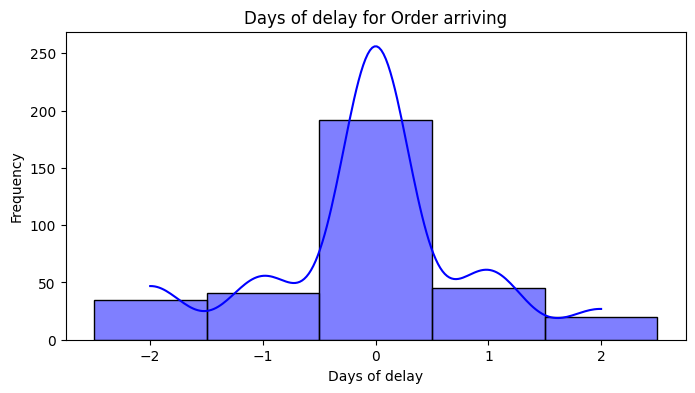

In [116]:
plt.figure(figsize=(8, 4))

# plt.subplot(1, 2, 1)
sns.histplot(df_muesli['delay_arrival'], kde=True, color='blue', discrete=True)

plt.title('Days of delay for Order arriving')
plt.xlabel('Days of delay')
plt.ylabel('Frequency')

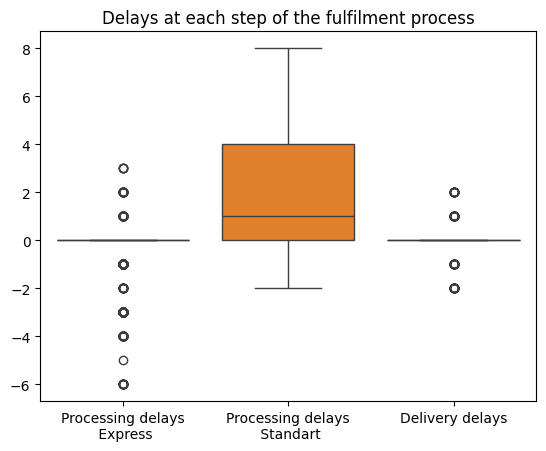

In [106]:
# sns.boxplot(data=df_muesli[['order_to_ready','order_to_truck','truck_to_arrival','total_days']])
sns.boxplot(data=df_muesli[['delay_on_truck_express','delay_on_truck_standard','delay_arrival']])
plt.xticks(ticks=[0, 1, 2],labels=['Processing delays\n Express', 'Processing delays\n Standart', 'Delivery delays'],rotation=0)

plt.title('Delays at each step of the fulfilment process')
plt.show()

### Calculating metrics

In [ ]:
# Calculating Warehouse efficiency
target_time_orders = ((df_muesli['order_to_ready']<=2.0).value_counts()).loc[True]
all_orders = df_muesli['order_to_ready'].notnull().value_counts().loc[True]
warehouse_efficiency = round(float(target_time_orders/all_orders*100),2)
warehouse_efficiency

38.73

In [121]:
# Calculating  On_time_shipment_percentage
target_days = (df_muesli['total_days']<=10.0).value_counts().loc[True]
all_days = df_muesli['total_days'].notnull().value_counts().loc[True]
on_time_shipment_percentage = round(float(target_days/all_days*100),2)
on_time_shipment_percentage

36.94

In [109]:
# Calculating Express order processing time
df_express = df_muesli.loc[df_muesli['ship_mode'] == 'Express']
df_express_days = df_express['order_to_ready'].mean().round(2)
df_express_days


np.float64(1.4)

In [110]:
kpi = {'KPI':['Order Processing Time','* Processing delays Express', '* Processing delays Standart','Warehouse Efficiency', 'Delivery Time'],
          'Measurement':['working days','days','days','%', 'working days'],
          'Target':[2,0,0,95,3],
          'Mean':[df_muesli['order_to_ready'].mean().round(),
                      df_muesli['delay_on_truck_express'].mean().round(),
                      df_muesli['delay_on_truck_standard'].mean().round(),
                      warehouse_efficiency,
                      df_muesli['truck_to_arrival'].mean().round()]
                      }

df_kpi = pd.DataFrame(kpi)
df_kpi

,KPI,Measurement,Target,Mean
0,Order Processing Time,working days,2,3.00
1,* Processing delays Express,days,0,-0.00
2,* Processing delays Standart,days,0,1.00
3,Warehouse Efficiency,%,95,38.73
4,Delivery Time,working days,3,3.00


## Extra Credit

In [111]:
# Create a simulated dataset
df_simulated = df_muesli.copy()
df_simulated['order_to_ready'] = df_simulated['order_to_ready'].apply(lambda x: np.random.choice(df_simulated['order_to_ready'].dropna().values) if np.isnan(x) else x)
df_simulated['order_to_truck'] = df_simulated['order_to_truck'].apply(lambda x: np.random.choice(df_simulated['order_to_truck'].dropna().values) if np.isnan(x) else x)
df_simulated['truck_to_arrival'] = df_simulated['truck_to_arrival'].apply(lambda x: np.random.choice(df_simulated['truck_to_arrival'].dropna().values) if np.isnan(x) else x)
df_simulated['total_days'] = df_simulated['total_days'].apply(lambda x: np.random.choice(df_simulated['total_days'].dropna().values) if np.isnan(x) else x)


In [112]:
df_simulated[['order_to_ready','order_to_truck','truck_to_arrival','total_days']].describe().round()

,order_to_ready,order_to_truck,truck_to_arrival,total_days
count,3003.0,3003.0,3003.0,3003.0
mean,3.0,6.0,3.0,11.0
std,1.0,2.0,1.0,3.0
min,0.0,0.0,1.0,3.0
25%,2.0,5.0,3.0,9.0
50%,3.0,7.0,3.0,11.0
75%,4.0,8.0,3.0,13.0
max,5.0,12.0,5.0,17.0


In [113]:
# Calculate average and 95th percentile
average_delivery_time = df_simulated['total_days'].mean().round()
percentile_95_delivery_time = np.percentile(df_simulated['total_days'], 95)

print(f'Average Delivery Time, days: {average_delivery_time}')
print(f'95th Percentile Delivery Time, days: {percentile_95_delivery_time}')

Average Delivery Time, days: 11.0
95th Percentile Delivery Time, days: 15.0
